##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [1]:
import pandas as pd
train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')


Then we separate the tweet text and the label (sentiment). 

In [2]:
#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

#check the result
print("Train length:",len(X_train_raw))

#separating instance and label for Test
X_test_raw = [x[0] for x in test_data[['text']].values]

#check the result
print("Test length:",len(X_test_raw))


Train length: 21802
Test length: 6099


In [10]:
Y_train.count("neutral")

12659

In [11]:
Y_train.count("positive")

5428

In [12]:
Y_train.count("negative")

3715

In [3]:
# obtain tweet id for test data
tweet_id = test_data['id']

In [4]:
#Let's see one example tweet
print(X_train_raw[0])

 doctors hit campaign trail as race to medical council elections heats up https://t.co/iifdwb9v0w #homeopathy


In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

lmtzr = WordNetLemmatizer()
ps = PorterStemmer()

# set up a punctuation removal without removing hashtags and @
remove = string.punctuation
stop = stopwords.words('english')

#remove punctuations from stopwords since the dataset also remove punctuations
for i in range(len(stop)):
    stop[i] = re.sub(r'[{}]'.format(remove),'',stop[i])


# preprocess dataset to remove strings that are not useful
def preprocess(dataset):
    # create a new list of data without influencing the raw data (后面如果不需要用到原始数据可以删掉，function input改成data)
    data = dataset.copy()
    # run through all the data
    for i in range(len(data)):   

        # convert all string to lowercase
        data[i] = data[i].lower()
        # replace all Urls 
        data[i] = re.sub(r'https?:\/\/\S+', '', data[i])
        # replace all username 
        data[i] = re.sub(r'@\S+', '', data[i])
        # remove all numbers in the data, (include 21st, 22nd, 23rd 24th etc). \b prevents 12stay removed
        data[i] = re.sub(r'\d+([th]|[rd]|[nd]|[st]){0,2}\b', '', data[i])
        # remove punctuations that are not # and @
        data[i] = re.sub(r'[{}]'.format(remove),' ',data[i])
         # split the string to remove stopwords
        data[i] = ' '.join([word for word in data[i].split() if word not in stop])
        # remove words that has 3 or more consequtive letter to two, eg. toooo and tooooooo -> too
        # (.) -> any letter, \1{3,} a letter that occurs 3 or more times, '\1'*2 replaced by two of this letter 
        data[i] = re.sub(r'(.)\1{3,}', r'\1'*2, data[i])
       
        # lemmatize or stem the string to reduce useless features after splitting
        # lemmatize: 
        data[i] = ' '.join([lmtzr.lemmatize(word) for word in data[i].split()])
        # stem
        #data[i] = ' '.join([ps.stem(word) for word in data[i].split()])
        # remove single letter from the data (considered to be useless)
        data[i] = ' '.join([word for word in data[i].split() if len(word)>1])

    return data

# obtain all words from the input data, check for number of features
def get_words(data):
    word_list = []
    for i in range(len(data)):
        a = data[i].split()
        for word in a:
            word_list.append(word)
    return list(set(word_list))



# preprocess training and test data set
preprocess_train = preprocess(X_train_raw)
preprocess_test = preprocess(X_test_raw)
# check percentage of features (words) remaining after preprocessing
train_raw_features = get_words(X_train_raw)
train_reduced_features = get_words(preprocess_train)


# print out the correponding data after preprocessing

print("Original count of feature: ", len(train_raw_features))
print("Reduced count of feature : ", len(train_reduced_features))
print("Percentage of features remaining after preprocessing is: {:.2f} %".format(len(train_reduced_features)/len(train_raw_features)*100))


# Check for reduced train list
print(preprocess_train[7])
print(X_train_raw[7])


Original count of feature:  69285
Reduced count of feature :  25099
Percentage of features remaining after preprocessing is: 36.23 %
today international day elimination violence woman orangetheworld unitednations unodc‚ä¶
 today is the international day for the elimination of violence against women #orangetheworld #unitednations #unodc‚ä¶ https://t.co/uyqctttufj


In [ ]:
#df.to_csv('Stack.csv', index=False)

In [6]:
#ngram_vectorizer = CountVectorizer()
#cleaned_X_train = ngram_vectorizer.fit_transform(preprocess_train)
#cleaned_X_test = ngram_vectorizer.fit_transform(preprocess_test)

In [7]:
#cleaned_X_train.shape

### 1. Bag of Words (BoW)
In this approach, we use the **CountVectorizer** library to separate all the words in the Train corpus (dataset). These words are then used as the 'vectors' or 'features' to represent each instance (Tweet) in `Train` and `Test` datasets. 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# ngram_range(1,1), extract unigram(single word) as a feature, min_df=2 -> remove all words that has count
# of 1
BoW_vectorizer = CountVectorizer(analyzer='word', tokenizer=word_tokenize, ngram_range=(1, 1), min_df=2)

#Build the feature set (vocabulary) and vectorise the Tarin dataset using BoW
X_train_BoW = BoW_vectorizer.fit_transform(preprocess_train)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_BoW = BoW_vectorizer.transform(preprocess_test)

print("Train feature space size (using BoW):",X_train_BoW.shape)
print("Test feature space size (using BoW):",X_test_BoW.shape)

Train feature space size (using BoW): (21802, 10838)
Test feature space size (using BoW): (6099, 10838)


Now each row is a list of tuples with the vector_id (word_id in the vocabulary) and the number of times it repeated in that given instance (tweet).

In [7]:
#Let's see one example tweet using the BoW feature space
print(X_train_BoW[7])
# check with preprocessed train


# there are more words in preprocesses_training data, meaning that some of the word only occured once
# in the whole dataset, thus removed in bow
preprocess_train[7]


  (0, 9708)	1
  (0, 4914)	1
  (0, 2439)	1
  (0, 3125)	1
  (0, 10268)	1
  (0, 10576)	1
  (0, 6738)	1
  (0, 10062)	1


'today international day elimination violence woman orangetheworld unitednations unodc‚ä¶'

We can save the created vocabulary for the given dataset in a separate file.

In [8]:
output_dict = BoW_vectorizer.vocabulary_

#把count 改成 index 了， 应该是对应词的index是多少，而不是数量
output_pd = pd.DataFrame(list(output_dict.items()),columns = ['word','index'])

output_pd.T.to_csv('BoW-vocab.csv',index=False)


### 2. TFIDF
In this approach, we use the **TfidfVectorizer** library to separate all the words in this corpus (dataset). Same as the BoW approach, these words are then used as the 'vectors' or 'features' to represent each instance (Tweet).

However, in this method for each instance the value associated with each 'vector' (word) is not the number of times the word repeated in that tweet, but the TFIDF value of then 'voctor' (word).

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', tokenizer=word_tokenize, ngram_range=(1, 1), min_df=2)

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf = tfidf_vectorizer.fit_transform(preprocess_train)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf = tfidf_vectorizer.transform(preprocess_test)

print("Train feature space size (using TFIDF):",X_train_tfidf.shape)
print("Test feature space size (using TFIDF):",X_test_tfidf.shape)

Train feature space size (using TFIDF): (21802, 10838)
Test feature space size (using TFIDF): (6099, 10838)


In [10]:
#Let's see one example tweet using the TFIDF feature space
print(X_train_tfidf[0])

#下面是自己写的，check一下是否对应tfidf
print(preprocess_train[0])

    

  (0, 4540)	0.2973684107537289
  (0, 4399)	0.36505993352771837
  (0, 3110)	0.265285906437884
  (0, 2201)	0.3588591865961827
  (0, 5947)	0.28970177149570553
  (0, 7603)	0.3066894684998837
  (0, 9790)	0.3618487380571425
  (0, 1480)	0.3084583389748632
  (0, 4494)	0.24838838909040165
  (0, 2834)	0.33672444344211444
doctor hit campaign trail race medical council election heat homeopathy


In [17]:
#from sklearn.feature_selection import chi2, mutual_info_classif
#from sklearn.feature_selection import SelectKBest

# k = number of top features selected
#k = int(len(train_reduced_features)*0.5)
#chi_best = SelectKBest(chi2, k=k).fit_transform(X_train_BoW, Y_train)

#k_best = SelectFpr(chi2, alpha=0.2).fit(X_train_BoW, Y_train)
#k_best_features_chi2 = [features[i] for i in k_best.get_support(indices=True)]

# 不用
#X_train, X_test, y_train, y_test = train_test_split(preprocess_train, Y_train, train_size=0.9)

# 3. Conduct Machine Learning
We need to first select features from the preprocessed data

In [11]:
#用training data先分成 train 和test测试
#分别是bow和tfidf的 train和test
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_train_BoW, Y_train, train_size=0.9)

x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_train_tfidf, Y_train, train_size=0.9)


# Baseline Model (0-R)

In [12]:
from sklearn.dummy import DummyClassifier
from collections import Counter
# 0-R baseline model
# this is a model prediction we need to beat

zero_r = DummyClassifier(strategy= 'most_frequent')
zero_r.fit(X_train, y_train)

zr_pred = zero_r.predict(X_test)
print("Base model (0-R) prediction accuracy is: ", zero_r.score(X_test, y_test))


Base model (0-R) prediction accuracy is:  0.5767996331957818


# Multinomial Naive Bayes

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB 
mnb = MultinomialNB()

X_train_bow = X_train_BoW.toarray()
x_test_bow = X_test_BoW.toarray()
#最后需要删掉上面一行, 用
# y_pred = mnb.fit(X_train_bow, Y_train).predict(x_test_bow)

mnb_bow_pred = mnb.fit(X_train, y_train).predict(X_test)



In [21]:
# df = pd.DataFrame(data={"id": tweet_id, "sentiment": y_pred})
# df.to_csv('MNB.csv', index=False)

In [22]:
# 用bow的prediction
print("Multinomial Naive Bayes accuracy using bow is: ", accuracy_score(mnb_bow_pred, y_test))

Multinomial Naive Bayes accuracy using bow is:  0.6286107290233838


In [23]:
mnb_tfidf_pred = mnb.fit(x_train_tfidf, y_train_tfidf).predict(x_test_tfidf)
print("Multinomial Naive Bayes accuracy using tfidf is: ", accuracy_score(mnb_tfidf_pred, y_test_tfidf))

Multinomial Naive Bayes accuracy using tfidf is:  0.6189821182943603


In [30]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from collections import Counter

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [58]:
#必须要的步骤
scaler = StandardScaler(with_mean=False)

clf = MLPClassifier(hidden_layer_sizes=[500,100,10,3], max_iter=2000)
#it is cheating because the mean and variance are estimated using both training and test data

In [59]:
x_train = scaler.fit_transform(x_train_tfidf)

y_train = []
for category in y_train_tfidf:
    if category=="neutral":
        y_train.append("0")
    if category=="negative":
        y_train.append("1")
    if category=="positive":
        y_train.append("2")

y_test = []
for category in y_test_tfidf:
    if category=="neutral":
        y_test.append("0")
    if category=="negative":
        y_test.append("1")
    if category=="positive":
        y_test.append("2")

mnb_tfidf_pred = mnb.fit(x_train_tfidf, y_train_tfidf).predict(x_test_tfidf)

In [60]:
mnp_prediction = clf.fit(x_train, y_train).predict(x_test_tfidf)

In [61]:
print(accuracy_score(mnp_prediction, y_test))

0.584135717560752


# Support Vector Machines (One Vs Rest)

In [14]:
from sklearn import svm
C = 0.4  # SVM regularization parameter 

#先用tfidf predict (linear SVM and polynomial)

linear_svm = svm.LinearSVC(C=C, max_iter=10000)
svm_tfidf_pred = linear_svm.fit(x_train_tfidf, y_train_tfidf).predict(x_test_tfidf)
print(accuracy_score(svm_tfidf_pred, y_test_tfidf))
    
#df = pd.DataFrame(data={"id": tweet_id, "sentiment": svm_pred})
#df.to_csv('One-vs-rest SVM.csv', index=False)


rbf = svm.SVC(kernel='rbf', gamma = 0.7, C=1)


svm_tfidf_poly_pred = rbf.fit(x_train_tfidf, y_train_tfidf).predict(x_test_tfidf)
print(accuracy_score(svm_tfidf_poly_pred, y_test_tfidf))

0.6643741403026134
0.6607060981201284


In [15]:
import matplotlib.pyplot as plt

In [28]:
a = 0.0001
i = 0.22
lst = []
while i < 0.23:
    lst.append(i)
    i = float("{:.5f}".format(i+a))

# bias = [0.001,0.01,0.05, 0.06,0.07,0.08,0.1,0.2,0.4,0.5,1,2,3]

error = []


for value in lst:
    linear_svm = svm.LinearSVC(C=value, max_iter=10000)
    svm_tfidf_pred = linear_svm.fit(x_train_tfidf, y_train_tfidf).predict(x_test_tfidf)
    error.append(1-accuracy_score(svm_tfidf_pred, y_test_tfidf))

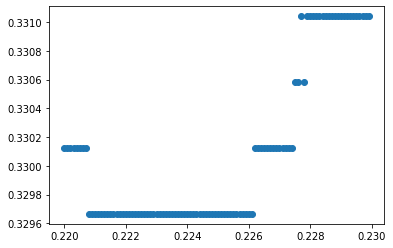

In [29]:
plt.scatter(lst, error)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Accuracy')

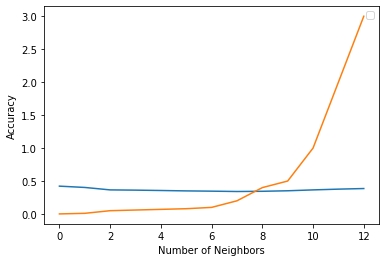

In [34]:
plt.plot(accuracy)

# Plot test accuracies
plt.plot(bias)

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

In [23]:
#用bow的prediction

svm_bow_pred = linear_svm.fit(X_train, y_train).predict(X_test)
print(accuracy_score(svm_bow_pred, y_test))


svm_bow_poly_pred = rbf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(svm_bow_poly_pred, y_test))

0.5850527281063732
0.567629527739569


# Multi-Class Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=10000, multi_class='multinomial')
lgr_bow_pred = lgr.fit(X_train,y_train).predict(X_test)
print("BOW Accuracy:",accuracy_score(lgr_bow_pred,y_test))

lgr_tfidf_pred = lgr.fit(x_train_tfidf,y_train_tfidf).predict(x_test_tfidf)
print("TFIDF Accuracy:", accuracy_score(lgr_tfidf_pred,y_test_tfidf))


BOW Accuracy: 0.6487849610270519
TFIDF Accuracy: 0.6762952773956901


# K-NN (5 closest neighbours)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

lst = []
i = 2
while i < 50:
    lst.append(i)
    i += 2

# knn_list = [3,5,7,9,15,20,25,]
print("TFIDF accuracy: ")
for num in lst:
    knn = KNeighborsClassifier(n_neighbors=num)
    predict = knn.fit(x_train_tfidf,y_train_tfidf).score(x_test_tfidf,y_test_tfidf)
    print("Accuracy for", num, "is", predict*100)
    
print("\nBOW accuracy: ")
for num in lst:
    knn = KNeighborsClassifier(n_neighbors=num)
    predict = knn.fit(X_train,y_train).score(X_test,y_test)
    print("Accuracy for", num, "is",predict*100)  


TFIDF accuracy: 
Accuracy for 2 is 58.73452544704264
Accuracy for 4 is 59.926639156350305
Accuracy for 6 is 60.15589179275561
Accuracy for 8 is 60.52269601100413
Accuracy for 10 is 60.66024759284731
Accuracy for 12 is 60.52269601100413
Accuracy for 14 is 60.84364970197157
Accuracy for 16 is 61.21045392022009
Accuracy for 18 is 61.71480972031178
Accuracy for 20 is 61.668959193030716
Accuracy for 22 is 61.806510774873914
Accuracy for 24 is 62.63182026593306
Accuracy for 26 is 62.310866574965615
Accuracy for 28 is 62.035763411279234
Accuracy for 30 is 62.265016047684554
Accuracy for 32 is 62.265016047684554
Accuracy for 34 is 62.35671710224667
Accuracy for 36 is 62.58596973865199
Accuracy for 38 is 62.54011921137093
Accuracy for 40 is 62.494268684089874
Accuracy for 42 is 62.90692342961945
Accuracy for 44 is 63.0903255387437
Accuracy for 46 is 62.72352132049519
Accuracy for 48 is 62.90692342961945

BOW accuracy: 
Accuracy for 2 is 53.278312700596054
Accuracy for 4 is 57.31315910132967
Acc

# ensemble model – stacking

In [36]:
import numpy as np
from sklearn.ensemble import StackingClassifier


linear_svm = svm.LinearSVC(C=0.2, max_iter=10000)



classifiers = [ ("logistic",lgr),
                ("SVM",linear_svm),
                ("KNN", KNeighborsClassifier(n_neighbors=10)),
                ("NB", mnb)]


stacker_lr = StackingClassifier(classifiers, final_estimator = LogisticRegression(max_iter=10000))


In [38]:
    
stack_model = stacker_lr.fit(X_train_bow, Y_train)

#predictions
test_pred = stack_model.predict(x_test_bow)



KeyboardInterrupt: 

In [ ]:
test_pred

df = pd.DataFrame(data={"id": tweet_id, "sentiment": test_pred})
df.to_csv('Stack.csv', index=False)